In [106]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms


In [112]:
df = pd.read_excel('../comparing_ir.xlsx',usecols=[1,4])

In [113]:
df = df.set_index(pd.date_range('2010-06','2022-04',freq='m'))
# before_covid = df[(df.index <'2020-03')]
before_covid= df.iloc[:112,:]
# before_covid = before_covid.resample('Q').interpolate()
after_covid = df.iloc[112:142,:] 

In [114]:
model_post_corona,model_corona = sm.OLS(before_covid['BOC_Policy_Rate'],sm.add_constant(before_covid['FED_Policy_Rate'])),sm.OLS(after_covid['BOC_Policy_Rate'],sm.add_constant(after_covid['FED_Policy_Rate']))

In [115]:
results_post_corona,results_corona = model_post_corona.fit(),model_corona.fit()

results_post_corona.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        BOC_Policy_Rate   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     104.3
Date:                Mon, 16 May 2022   Prob (F-statistic):           1.27e-17
Time:                        19:27:05   Log-Likelihood:                -7.7423
No. Observations:                 112   AIC:                             19.48
Df Residuals:                     110   BIC:                             24.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.7265      0.035     21.021      0.000       0.658       0.795
FED_Policy_Rate     0.3379      0.033     10.213      0.000       0.272       0.404
==============================================================================
Omnibus:                       17.300   Durbin-Watson:                   0.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.843
Skew:                          -0.879   Prob(JB):                     0.000220
Kurtosis:                       2.280   Cond. No.                         2.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
results_corona.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        BOC_Policy_Rate   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.014e+32
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        19:27:06   Log-Likelihood:                 1040.7
No. Observations:                  30   AIC:                            -2077.
Df Residuals:                      28   BIC:                            -2075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.163e-17   5.31e-17      0.784      0.440   -6.72e-17     1.5e-16
FED_Policy_Rate     1.0000   7.05e-17   1.42e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       16.305   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.800
Skew:                          -1.789   Prob(JB):                     0.000136
Kurtosis:                       4.200   Cond. No.                         2.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Normality Test

In [117]:
print(f'P Value of JB Test for Post Corona BOC : {stats.jarque_bera(results_post_corona.resid)[1]}\nP Value of JB Test for After Corona BOC : {stats.jarque_bera(results_corona.resid)[1]}')

P Value of JB Test for Post Corona BOC : 0.00022013531148956655
P Value of JB Test for After Corona BOC : 0.00013638892648204504


Text(0.5, 1.0, 'Residual Distribution for Post Corona (BOC)')

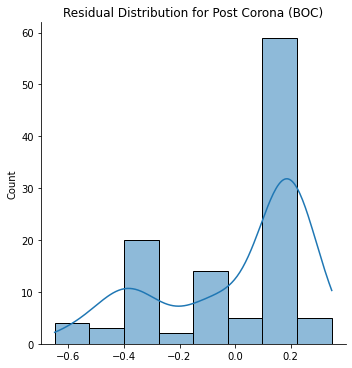

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(results_post_corona.resid,kde=True)
plt.title('Residual Distribution for Post Corona (BOC)')

Heteroscedasticity Test (Breusch-Pagan)

In [119]:
print(f'Before Corona P Value : {sms.het_breuschpagan(results_post_corona.resid,results_post_corona.model.exog)[1]}\nAfter Corona P Value : {sms.het_breuschpagan(results_corona.resid,results_corona.model.exog)[1]:.4f}')

Before Corona P Value : 0.7957064683556221
After Corona P Value : 0.0000


Clearly Seems 

After Covid period, Bank of canada has same interest rates w/FED

In post corona period, There is no Heteroscedasticity or Normality problem.

Text(0.5, 1.0, 'Post Corona Period (BOC)')

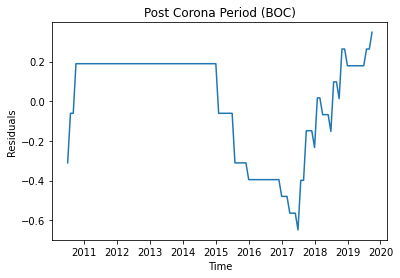

In [256]:
sns.lineplot(x=before_covid.index,y=results_post_corona.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Post Corona Period (BOC)')

Text(0.5, 1.0, 'Post Corona Period (BOC)')

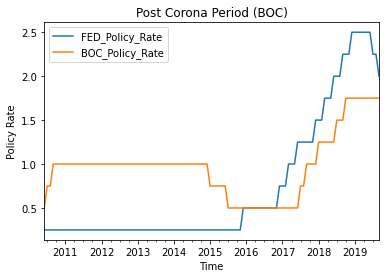

In [123]:
before_covid.plot()
plt.xlabel('Time')
plt.ylabel('Policy Rate')
plt.title('Post Corona Period (BOC)')

Text(0.5, 1.0, 'After Corona Period (BOC)')

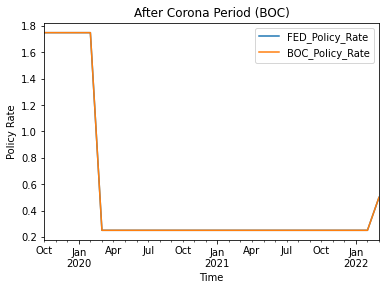

In [124]:
after_covid.plot()
plt.xlabel('Time')
plt.ylabel('Policy Rate')
plt.title('After Corona Period (BOC)')

In [259]:
print('p value of Breusch-Godfrey test is: ', sms.acorr_breusch_godfrey(results_post_corona,nlags=1)[3])
print('The Durbin-Watson statistic is: ', sms.durbin_watson(results_post_corona.resid))

p value of Breusch-Godfrey test is:  1.08039761955572e-57
The Durbin-Watson statistic is:  0.08512985309566685


In [260]:
##Seems Post Corona period suffers autocorrelation


In [185]:
from statsmodels.tsa.ardl import ARDL
from sklearn.metrics import r2_score

In [186]:
ardl = ARDL(before_covid['BOC_Policy_Rate'],[1,2],sm.add_constant(before_covid['FED_Policy_Rate']),{'FED_Policy_Rate':2})

c:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\ardl\model.py:158: SpecificationWarning: exog contains variables that are missing from the order dictionary.  Missing keys: const.
  warnings.warn(msg, SpecificationWarning)


In [187]:
r1 = ardl.fit()

In [188]:
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:        BOC_Policy_Rate   No. Observations:                  112
Model:                     ARDL(2, 2)   Log Likelihood                 154.949
Method:               Conditional MLE   S.D. of innovations              0.059
Date:                Mon, 16 May 2022   AIC                           -295.898
Time:                        20:37:18   BIC                           -276.995
Sample:                    08-31-2010   HQIC                          -288.231
                         - 09-30-2019                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0133      0.020      0.662      0.510      -0.027       0.053
BOC_Policy_Rate.L1     0.9385      0.088     10.703      0.000       0.765       1.112
BOC_Policy_Rate.L2     0.0347      0.084      0.412      0.682      -0.133       0.202
FED_Policy_Rate.L0    -0.0378      0.078     -0.484      0.629      -0.193       0.117
FED_Policy_Rate.L1     0.3887      0.107      3.647      0.000       0.177       0.600
FED_Policy_Rate.L2    -0.3275      0.087     -3.756      0.000      -0.500      -0.155
======================================================================================
"""

In [189]:
print('The Durbin-Watson statistic is: ', sms.durbin_watson(r1.resid))

The Durbin-Watson statistic is:  1.9427190246681483


In [239]:
exog =sm.add_constant(before_covid['FED_Policy_Rate'][2:])
print(f'Breusch-Pagan Heteroscedasticity Test P Value : {sms.het_breuschpagan(r1.resid,exog)[1]}')

Breusch-Pagan Heteroscedasticity Test P Value : 0.4809033038049495


In [240]:
r1.test_normality()


Jarque-Bera    3.710789e+02
P-value        2.637811e-81
Skewness       1.913727e-01
Kurtosis       1.198978e+01
dtype: float64

Text(0.5, 1.0, 'Residual Distribution of Post Corona ARDL(2,2) Model/Bank of Canada')

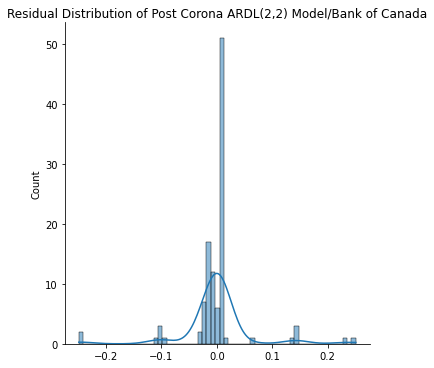

In [257]:
sns.displot(r1.resid,kde=True)
plt.title('Residual Distribution of Post Corona ARDL(2,2) Model/Bank of Canada')

In [249]:
r2 = r2_score(before_covid['BOC_Policy_Rate'][2:],r1.fittedvalues)
print(f'R² = {r2:.4f}')

R² = 0.9733


Functions Of BOC Policy Rates

In [253]:
print(f'y = {results_corona.params[0]:.2f}+{results_corona.params[1]:.2f}x\n\n\nWhere\ny = After Corona BOC Policy Rate\nx = After Corona FED Policy Rate\n\n(They are equal in After Corona Period)')

y = 0.00+1.00x


Where
y = After Corona BOC Policy Rate
x = After Corona FED Policy Rate

(They are equal in After Corona Period)


In [251]:
print(f'y = {r1.params[0]} + {r1.params[1]}y(t-1) + {r1.params[2]}y(t-2) + {r1.params[3]}x + {r1.params[4]}x(t-1) + {r1.params[5]}x(t-2)\n\n\nWhere\ny = Post Corona BOC Policy Rate\nx = Post Corona FED Policy Rate')

y = 0.01327953694798079 + 0.9384657718786792y(t-1) + 0.03470721413256411y(t-2) + -0.0378178076030401x + 0.38865521700000044x(t-1) + -0.3274706346718126x(t-2)


Where
y = Post Corona BOC Policy Rate
x = Post Corona FED Policy Rate
